### 1. Review 
- what is random variable
- what is distribution

### 2. weighted average
- 2 stock portfolio, winner stock stock outperforms buffett. losing stock outperforms buffett. portfolio underperform buffett. why?
warren: KO 5%, std 10%, weight = 10%, WMT 20%, std 30%, weight = 90% in Wmt, 10 in KO. expected turn = 90% X 20% + 10% X 5% = 18.5% (20% + 5%)/2 = average 
port std < 10% x 10% + 30% x 90% only the correlation (-1, 1) between the 2 stocks is 1. 

Me: PEP 6%, COST 30% 90% in pep, 10 in cost. 10% x 30% + 90% x 6% = 8.4%

- dot product.

### 3. Correlation between random variables
- correlation (-1, 1)

### some insights
- good investment decisions include 2 parts: selection and allocation. allocation is more important. expected return of port is weighted average of each stock
- diversification never increase the std of the portfolio beyond the weight average and usually reduce the std of the portfolio comparing to the weighted average of std of each stock

### 4. portforlio management in theory and practice

### Portfolio management in theory
- if there is no uncertainty/risks do we still need portfolio management?
- allocation decision -> get higher weighted return, get lower port std
- what is beta? cov/var 


### Portfolio management in practice
1. What is stock market? What is bond market? What are asset classes? What is a market index?
2. Is market efficent? is chess game efficent?
3. What's the difference between investing and trading? Investing and trading are 2 different games.
4. How to make money by investing? By predicting market? or By understanding the rules of the game and having an edge. Value/Growth/Quant etc.
5. What are investing decisions? investment decision and allocation decision.
6. What is portfolio management? investment decision + allocation decision -> Higher expected return, lower risk.

### Activity 1: correlation

In [ ]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

In [ ]:
# Read the ice cream sales data, set the `Month` as the index
ice_cream_data = Path("./Resources/ice_cream.csv")
ice_cream = pd.read_csv(ice_cream_data, index_col="Month")
ice_cream.head()

In [ ]:
# Read the drowning incident data, set the `Month` as the index
drowning_data = Path("./Resources/drowning.csv")
drowning = pd.read_csv(drowning_data, index_col="Month")
drowning.head()

In [ ]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined_df = pd.concat([ice_cream, drowning], axis="columns", join="inner")
combined_df

In [ ]:
# Plot the data trends of the two variables over time
combined_df.plot()

In [ ]:
# Plot the relationship between the two variables
combined_df.plot(kind="scatter", x="Ice Cream Sales", y="Drowning Incidents")

In [ ]:
# Calculate the correlation between each column
correlation = combined_df.corr()
correlation

### some insights
- correlation is not causation


### Activity 2 Rolling Window Object

In [ ]:
# Read the TSLA data, set the `date` as the index
tsla_data = Path("./Resources/tsla_historical.csv")
tsla_df = pd.read_csv(tsla_data, index_col="date")
tsla_df.index = pd.to_datetime(tsla_df.index, format='%m/%d/%y') # explicit converting the 'date' column to a datatime object
# Sorting the date index in ascending order
tsla_df = tsla_df.sort_index()
# Display sample data
tsla_df.head(20)

In [ ]:
tsla_df.plot()
tsla_df.count()

In [ ]:
tsla_df.rolling(window=7).mean().plot()


In [ ]:
# Set figure of the daily closing prices of Tesla
ax = tsla_df.plot()

# Plot 180-Day Rolling Mean on the same figure
tsla_df.rolling(window=180).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["TSLA", "TSLA 180 Day Mean"]);

### activity 5 beta

In [ ]:
# Read the daily closing prices of AMZN, set the `date` as a datetime index
amzn_data = Path("./Resources/amzn_data.csv")
amzn_df = pd.read_csv(amzn_data, index_col="date")

amzn_df.index = pd.to_datetime(amzn_df.index, format = ')
amzn_df.head()'%m/%d/%y

In [ ]:
# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("./Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date")
sp500_df.index = pd.to_datetime(sp500_df.index, format = '%m/%d/%y')
sp500_df.head()

In [ ]:
combined_df = pd.concat([amzn_df, sp500_df], axis="columns", join="inner")
combined_df
# Sort datetime index in ascending order (past to present). #this is a bug.
combined_df = combined_df.sort_index()
combined_df
# Set column names to 'AMZN' and 'S&P 500'
combined_df.columns = ["AMZN", "S&P 500"]

# Display a few rows
combined_df.head()

In [ ]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

In [ ]:
# Calculate variance of all daily returns of AMZN vs. S&P 500
variance = daily_returns['S&P 500'].var()
variance

In [ ]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_covariance = daily_returns['AMZN'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns')

In [ ]:
# Calculate 30-day rolling variance of AMZN vs. S&P 500 and plot the data
rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

In [ ]:
# Calculate 30-day rolling beta of AMZN and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of AMZN')

### activity 7 portfolio construction

In [54]:
# Read the EMB Historical Closing Prices
enb_data = Path("./Resources/emb_historical.csv")
enb = pd.read_csv(enb_data, index_col="Trade DATE")
enb.index = pd.to_datetime(enb.index, format = '%m/%d/%Y') # Cap Y is for 2019, lower case y is for 19
enb = enb.sort_index()
enb.head()

,Symbol,NOCP
Trade DATE,,
2018-05-15,ENB,12.45
2018-05-16,ENB,12.82
2018-05-17,ENB,12.82
2018-05-18,ENB,13.00
2018-05-21,ENB,12.99


In [55]:
# Read the IMO Historical Closing Prices
imo_data = Path("./Resources/imo_historical.csv")
imo = pd.read_csv(imo_data, index_col="Trade DATE")
imo.index = pd.to_datetime(imo.index, format = '%m/%d/%Y')
imo = imo.sort_index()
imo.head()

,Symbol,NOCP
Trade DATE,,
2018-05-15,IMO,54.01
2018-05-16,IMO,56.50
2018-05-17,IMO,54.70
2018-05-18,IMO,53.39
2018-05-21,IMO,55.48


In [57]:
enb.rename(columns = {'NOCP':"ENB"}, inplace = True)
enb.drop(columns= 'Symbol', inplace = True)
imo.rename(columns= {'NOCP':"IMO"}, inplace = True)
imo.drop(columns= 'Symbol', inplace = True)
all_prices = pd.concat([enb, imo], axis = 'columns', join = 'inner')
all_prices

,ENB,IMO
Trade DATE,,
2018-05-15,12.45,54.01
2018-05-16,12.82,56.50
2018-05-17,12.82,54.70
2018-05-18,13.00,53.39
2018-05-21,12.99,55.48
...,...,...
2019-05-07,26.66,40.26
2019-05-08,27.09,39.75
2019-05-09,27.21,39.27


In [ ]:
# # Create a new pivot table where the columns are the closing prices for each ticker
# all_prices = pd.concat([enb, imo], axis="rows", join="inner")
# all_prices = all_prices.reset_index()
# all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
# all_prices.head()

In [58]:
# Calculate Daily Returns
all_returns = all_prices.pct_change()
all_returns.head()

,ENB,IMO
Trade DATE,,
2018-05-15,NaN,NaN
2018-05-16,0.029719,0.046103
2018-05-17,0.000000,-0.031858
2018-05-18,0.014041,-0.023949
2018-05-21,-0.000769,0.039146


In [59]:
# Calculate Portfolio Returns with an equal amount of each stock
enb_weight = 0.8
imo_weight = 0.2

portfolio_returns = enb_weight * all_returns["ENB"] + imo_weight * all_returns["IMO"]
portfolio_returns.head()

Trade DATE
2018-05-15         NaN
2018-05-16    0.032996
2018-05-17   -0.006372
2018-05-18    0.006443
2018-05-21    0.007214
dtype: float64

In [60]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
import numpy as np
volatility = all_returns.std() * np.sqrt(252)
volatility

ENB    0.682623
IMO    0.461623
dtype: float64

In [61]:
returns = all_returns.mean() * 252
returns

ENB    0.985754
IMO   -0.265462
dtype: float64

In [62]:
port_volatility = portfolio_returns.std() * np.sqrt(252)
port_volatility

0.5962160925236738

In [63]:
port_return = portfolio_returns.mean()*252
port_return

0.7355105872660318

<Axes: xlabel='Trade DATE'>

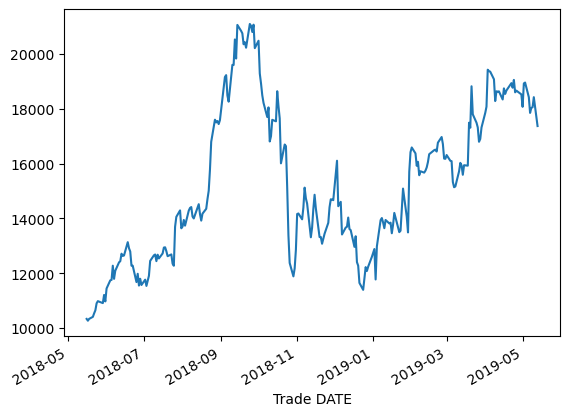

In [64]:
# Set initial investment
initial_investment = 10000

# Set weights
weights = [0.8, 0.2]

# Use the `dot` function to multiply the weights by each column of daily returns to calculate the daily returns of the portfolio.
portfolio_returns = all_returns.dot(weights)

# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Compute cumulative returns
cumulative_profit = initial_investment * cumulative_returns

# Plot the returns of the investment
cumulative_profit.plot()